# Project Checkpoint 2

Import libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

## Column Names and Descriptions

Column Name, Data Type, and Description
(Edited from description of original dataset https://www.kaggle.com/datasets/sahilislam007/letterbox-movie-classification-dataset?resource=download)

*   **Film_title**: String; The title of the movie.
*   **Director**: String; The primary director(s) of the movie. Multiple directors are listed together.
*   **Average_rating**: Float; The average user rating for the movie (on a scale of 1 to 5).
*   **Genres**: List; A list of genres associated with the movie (e.g., ['Horror', 'Drama']).
*   **Runtime**: Float; The runtime of the movie in minutes.
*   **Original_language**: String; The original of the movie.
*   **Description**: String; A brief synopsis or description of the movie’s plot or theme.
*   **Studios**: List; A list of production studios associated with the movie.
*   **Watches**: Integer; The total number of times the movie has been watched by users.
*   **List_appearances**: Integer; The number of times the movie appears in user-curated lists.
*   **Likes**: Integer; The total number of likes the movie has received from users.
*   **Fans**: Integer; The number of users who have marked themselves as fans of the movie.
*   **Lowest★**: Integer; The number of 1-star ratings the movie has received.
*   **Medium★★★**: Integer; The number of 3-star ratings the movie has received.
*   **Highest★★★★★**: Integer; The number of 5-star ratings the movie has received.
*   **Total_ratings**: Integer; The total number of ratings (across all star levels) for the movie.

## Data Preprocessing

Read in Letterboxd dataset as DataFrame

In [ ]:
letterboxd_df = pd.read_csv("Letterbox Movie Classification Dataset.csv")

Display number of rows and columns

In [ ]:
num_rows, num_columns = letterboxd_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 10000
Number of columns: 17


Display column names and data types

In [ ]:
column_names = letterboxd_df.columns
print(column_names)

print(letterboxd_df.dtypes)

Index(['Unnamed: 0', 'Film_title', 'Director', 'Average_rating', 'Genres',
       'Runtime', 'Original_language', 'Description', 'Studios', 'Watches',
       'List_appearances', 'Likes', 'Fans', 'Lowest★', 'Medium★★★',
       'Highest★★★★★', 'Total_ratings'],
      dtype='object')
Unnamed: 0             int64
Film_title            object
Director              object
Average_rating       float64
Genres                object
Runtime              float64
Original_language     object
Description           object
Studios               object
Watches                int64
List_appearances       int64
Likes                  int64
Fans                   int64
Lowest★                int64
Medium★★★              int64
Highest★★★★★           int64
Total_ratings          int64
dtype: object


Display count of each column

In [ ]:
count = letterboxd_df.count()
print(count)

Unnamed: 0           10000
Film_title           10000
Director             10000
Average_rating       10000
Genres               10000
Runtime              10000
Original_language    10000
Description          10000
Studios              10000
Watches              10000
List_appearances     10000
Likes                10000
Fans                 10000
Lowest★              10000
Medium★★★            10000
Highest★★★★★         10000
Total_ratings        10000
dtype: int64


## Remove duplicates

In [ ]:
# Drop duplicate movies
letterboxd_df = letterboxd_df.drop_duplicates()
# Optional: Test if there are still duplicates
# print("Number of duplicate rows:", letterboxd_df.duplicated().sum())
# Reset index
letterboxd_df = letterboxd_df.reset_index(drop=True)

# Statistical Conclusions
## Top genres represented (Kimberly)

Note: Some movies have multiple genres. If a movie has four genres for example, then that would count as an occurrence of each those genres (four total occurrences), even though it is only for one movie.

In [ ]:
import ast

# Function to check for correct formatting of movie genres
def normalize_genres(row):
  x = row["Genres"]
  film = row["Film_title"]

  if isinstance(x, list):
    return x
  elif isinstance(x, str):
    if x == "Unknown":
      return ["Unknown"]
    try:
      parsed = ast.literal_eval(x)
      if not isinstance(parsed, list):
        raise ValueError(f"Parsed value is not a list: {parsed}")
      return parsed
    except Exception as e:
      raise ValueError(f"Error parsing genres for '{film}': {e}")
  else:
    raise TypeError(f"Genres has unexpected type {type(x)} for '{film}'")

# Apply function
letterboxd_df["Normalized_Genres"] = letterboxd_df.apply(normalize_genres, axis=1)

# Fix movies with invalid genres to have "Unknown"
movies_to_fix = ["Ring of the Nibelungs", "King Solomon's Mines"]
letterboxd_df.loc[
    letterboxd_df["Film_title"].isin(movies_to_fix), "Genres"
] = "Unknown"

# Explode list
letterboxd_df_exploded = letterboxd_df.explode("Normalized_Genres")

# Count occurrences of each genre
genre_counts = letterboxd_df_exploded["Normalized_Genres"].value_counts()
print(genre_counts)

Normalized_Genres
Drama                                                 4416
Comedy                                                2932
Thriller                                              2312
Action                                                2074
Horror                                                1812
Crime                                                 1523
Adventure                                             1448
Romance                                               1373
Science Fiction                                       1265
Fantasy                                                995
Mystery                                                835
Family                                                 718
Animation                                              689
History                                                451
Documentary                                            430
War                                                    361
Music                                 

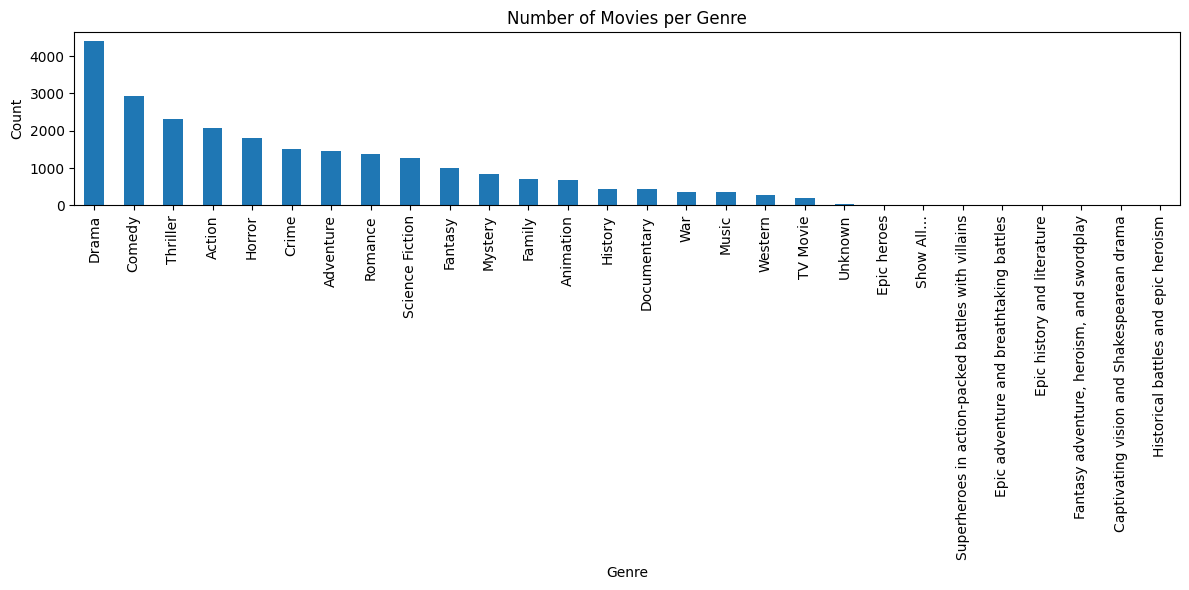

In [ ]:
# Graph number of movies per genre
genre_counts.plot(kind='bar', figsize=(12,6))
plt.title("Number of Movies per Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Correlation between runtime of movies and average rating (Omari)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9693 entries, 0 to 9692
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Runtime          9693 non-null   float64
 1   Combined_rating  9693 non-null   float64
dtypes: float64(2)
memory usage: 151.6 KB
None
   Runtime  Combined_rating
0    121.0             4.18
1     99.0             3.93
2    102.0             3.79
3    124.0             4.28
4    102.0             3.77


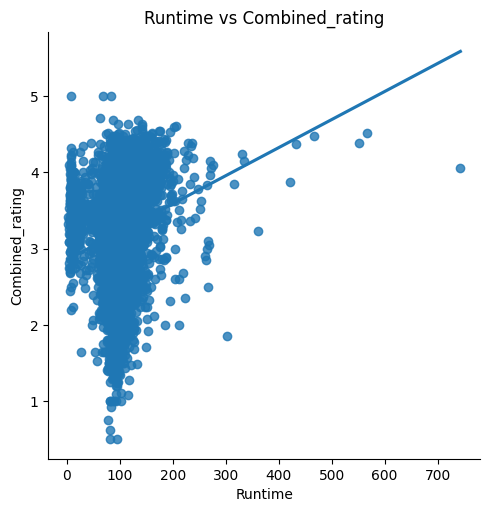

Correlation between runtime and rating: 0.184557026459055


In [ ]:
df = pd.read_csv("Finalized_movie_data.csv")
#gotta see if there is missing data

print(df[['Runtime', 'Combined_rating']].info())
print(df[['Runtime', 'Combined_rating']].head())
#Clean up crew

df_clean = df[['Runtime', 'Combined_rating']].dropna()

X_axis = 'Runtime'
Y_axis = 'Combined_rating'

sns.lmplot(data=df_clean, x=X_axis, y=Y_axis, ci=None)
plt.title(f"{X_axis} vs {Y_axis}")
plt.show()

#How they correlate
correlation = df_clean['Runtime'].corr(df_clean['Combined_rating'])
print("Correlation between runtime and rating:", correlation)

# Summary of further data collection, as well as initial data exploration:

After looking through the data and getting some more statistics about it, we decided that, while our starting dataset was okay, there were only a few features in it that we could actually use to predict ratings. Because of this, we decided that we wanted to collect more data, and so we found the site TMDB which had more data about most of the movies in our original dataset. Before we could go any further though, we standardized column names by renaming a few for consistency. Also, we removed duplicate entries by identifying and dropping any repeated records based on title, directors, runtime, and description.
To better structure the data, we split the director field into two separate columns to account for films with multiple directors. We then attempted to match each movie in the original dataset with its corresponding entry in TMDB by comparing title, director(s), and movie description. Through this approach, we were able to successfully match over 9,700 entries. However, we discovered that some of the entries in the original dataset were not actually movies, but television shows, so we dropped those entries.
Using the matched TMDB IDs, we gathered additional information for the corresponding films, such as budget, revenue, release date, MPAA rating, and top billing actors. While this enriched our dataset, we observed that some movies still had incomplete data on TMDB, especially when it came to budget and revenue.
We used lists of Academy Award-nominated actors, directors, and studios to create numerical indicators in our data that represent whether a film featured an award-nominated director, as well as how many award-nominated actors and movie studios were involved. We also processed the film certification (MPAA rating) to create a new variable with six distinct rating categories (e.g., G = 1, PG = 2).
We standardized the genre data by consolidating similar or overlapping genres to reduce the number of unique genre options. Each genre was then separated into individual binary columns using one-hot encoding to make them easier to analyze. The release date field was also parsed and split into separate columns for year, month, and day. For the language column, we grouped together languages with very few entries into a single category, “Other.” We then assigned numeric codes to the most common languages (e.g., English = 1, Italian = 2) and stored them in a new column.
Finally, we noticed that many films had a suspiciously identical rating value of approximately 3.2685. This suggested that missing ratings may have been filled in with an average value by whoever put the original dataset together, potentially biasing the data. We addressed this by implementing a rule to replace these values when better data from TMDB was available.


# Identifying outliers by looking at the correlation between top actors and more watches (Elliott)



In [ ]:
complete_df = pd.read_csv("Finalized_movie_data.csv")

column_names = complete_df.columns
print(column_names)

Index(['Lboxd_ID', 'TMDB_ID', 'Title', 'Budget', 'Revenue',
       'Movie_certification', 'Release_date', 'TMDB_rating',
       'TMDB_total_ratings', 'Directors', 'Lboxd_rating', 'Genres', 'Runtime',
       'Original_language', 'Description', 'Studios', 'Watches',
       'Lboxd_total_ratings', 'Director_one', 'Director_two',
       'Academy_award_actors', 'Academy_award_director',
       'Academy_award_studio', 'Drama', 'Comedy', 'Other', 'Thriller',
       'Action', 'Horror', 'Crime', 'Adventure', 'Romance', 'Science Fiction',
       'Fantasy', 'Mystery', 'Family', 'Release_year', 'Release_month',
       'Release_day', 'Certification_number', 'Language_number',
       'Combined_rating'],
      dtype='object')


It turns out that the more Academy Award nominated actors were in a certain movie, the higher the rating for that movie. However, the correlation is even higher once outliers are dealt with by adding a cap of 20 to the number of actors considered. This is an effective way to deal with the outliers in this case because there are so few above that threshold.

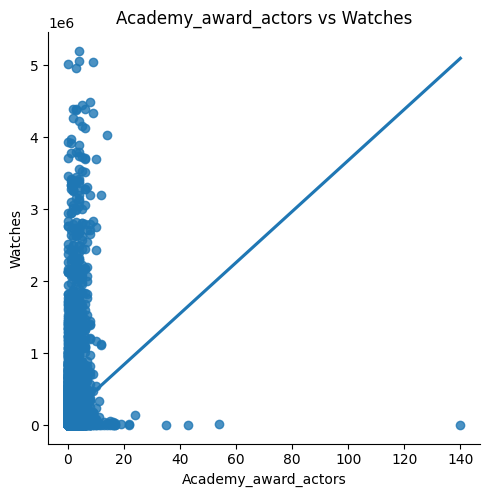

Correlation: 0.18708287918828842


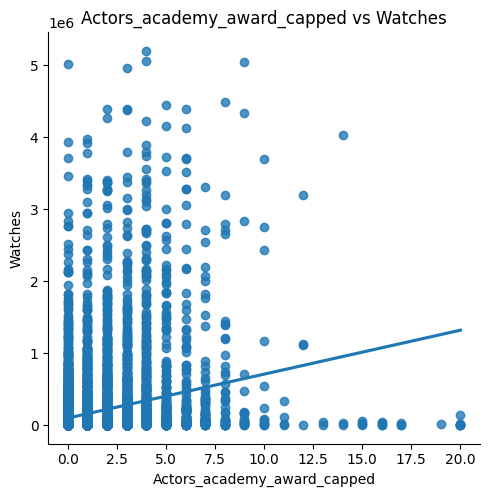

Correlation: 0.2474474907089714


In [ ]:
X_axis = 'Academy_award_actors'
Y_axis = 'Watches'

# Plot with outlier
sns.lmplot(data=complete_df, x=X_axis, y=Y_axis, ci=None)
plt.title(f"{X_axis} vs {Y_axis}")
plt.show()

# Correlation calculation
correlation = complete_df[X_axis].corr(complete_df[Y_axis])
print(f"Correlation: {correlation}")

complete_df['Actors_academy_award_capped'] = complete_df['Academy_award_actors'].apply(lambda x: min(x, 20))

# Plot
X_axis = 'Actors_academy_award_capped'
Y_axis = 'Watches'

# Plot without outlier
sns.lmplot(data=complete_df, x=X_axis, y=Y_axis, ci=None)
plt.title(f"{X_axis} vs {Y_axis}")
plt.show()

# Correlation calculation
correlation = complete_df[X_axis].corr(complete_df[Y_axis])
print(f"Correlation: {correlation}")

In the final version of our dataset, there are 10 features that can potentially be used to determine average rating, revenue, and number of watches (though the genre feature has been split into 14 columns). There are also ultimately 9693 useable entries, although with further exploration and testing, we may find more entries that cannot be used.
